In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("poker-hand-training-true.data", header=None)

In [3]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25010 entries, 0 to 25009
Data columns (total 11 columns):
0     25010 non-null int64
1     25010 non-null int64
2     25010 non-null int64
3     25010 non-null int64
4     25010 non-null int64
5     25010 non-null int64
6     25010 non-null int64
7     25010 non-null int64
8     25010 non-null int64
9     25010 non-null int64
10    25010 non-null int64
dtypes: int64(11)
memory usage: 2.1 MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f442ff39400>,
      dtype=object)

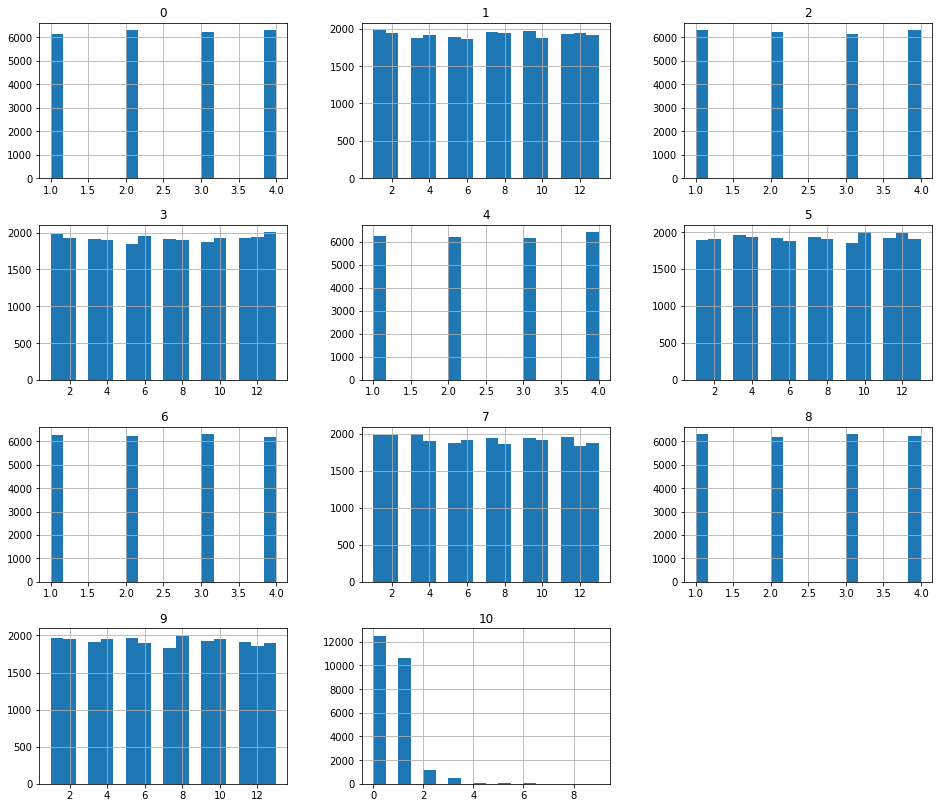

In [5]:
dataset.hist(bins=18, figsize=(16, 14))

In [6]:
dataset[10].value_counts()

0    12493
1    10599
2     1206
3      513
4       93
5       54
6       36
7        6
9        5
8        5
Name: 10, dtype: int64

In [7]:
corr_matrix = dataset.corr()
corr_matrix[10].sort_values(ascending=False)

10    1.000000
7     0.010163
0     0.008244
4     0.003951
1     0.002312
2    -0.001135
6    -0.001552
9    -0.002414
3    -0.005191
8    -0.005616
5    -0.006256
Name: 10, dtype: float64

In [8]:
X_train = dataset.iloc[:, :-1].values
y_train = dataset.iloc[:, -1].values

m, n = X_train.shape
train_size = m

In [9]:
n_inputs = n
n_hidden1 = 300
n_hidden2 = 140
n_hidden3 = 70
n_outputs = 10

In [10]:
dataset_testing = pd.read_csv("poker-hand-testing.zip", compression="zip", header=None)

In [11]:
X_test = dataset_testing.iloc[:, :-1].values
y_test = dataset_testing.iloc[:, -1].values

test_size, _ = X_test.shape 

In [12]:
import tensorflow as tf

X = tf.placeholder(tf.float32, shape=(None, n_inputs))
y = tf.placeholder(tf.int32, shape=(None))

training = tf.placeholder_with_default(False, shape=())

In [13]:
drop_rate = 0.1

hidden1 = tf.layers.dense(X, n_hidden1, activation=tf.nn.elu)
hidden1_drop = tf.layers.dropout(hidden1, drop_rate, training=training)

hidden2 = tf.layers.dense(hidden1_drop, n_hidden2, activation=tf.nn.elu)
hidden2_drop = tf.layers.dropout(hidden2, drop_rate, training=training)

hidden3 = tf.layers.dense(hidden2_drop, n_hidden3, activation=tf.nn.elu)
hidden3_drop = tf.layers.dropout(hidden3, drop_rate, training=training)
logits = tf.layers.dense(hidden3_drop, n_outputs)

In [14]:
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(xentropy)

In [15]:
learning_rate = 0.01

optimizer = tf.train.MomentumOptimizer(learning_rate, momentum=0.9, use_nesterov=True)
training_op = optimizer.minimize(loss)

In [16]:
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [17]:
init = tf.global_variables_initializer()

In [18]:
n_epochs = 100
batch_size = 70
n_batches = int(np.ceil(m/batch_size))

In [19]:
def fetch_batch(epoch, batch_index, batch_size):
    np.random.seed(epoch * batch_index + batch_size)
    indices = np.random.randint(train_size, size=batch_size)
    X_batch = X_train[indices]
    y_batch = y_train[indices]
    return X_batch, y_batch

In [20]:
extra_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)

with tf.Session() as sess:
    init.run()
    
    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size)
            sess.run([training_op, extra_update_ops], feed_dict={training: True, X: X_batch, y: y_batch})
        
        if epoch % 5 == 0:
            train_acc_val = accuracy.eval(feed_dict={X: X_batch, y: y_batch})    
            test_acc_val = accuracy.eval(feed_dict={X: X_test, y: y_test}) 
            test_loss_val = loss.eval(feed_dict={X: X_test, y: y_test})
        
            print("Epoch: ", epoch, "Train Acc: {:.3f}".format(100*train_acc_val),
                                    "Test Acc: {:.3f}".format(100*test_acc_val),
                                    "Test Loss: {:.3f}".format(100*test_loss_val))

Epoch:  0 Train Acc: 100.000 Test Acc: 44.472 Test Loss: 515.160
Epoch:  5 Train Acc: 61.429 Test Acc: 53.495 Test Loss: 95.842
Epoch:  10 Train Acc: 58.571 Test Acc: 55.904 Test Loss: 93.294
Epoch:  15 Train Acc: 58.571 Test Acc: 55.689 Test Loss: 92.908
Epoch:  20 Train Acc: 57.143 Test Acc: 56.761 Test Loss: 92.520
Epoch:  25 Train Acc: 55.714 Test Acc: 57.459 Test Loss: 91.339
Epoch:  30 Train Acc: 64.286 Test Acc: 56.725 Test Loss: 91.719
Epoch:  35 Train Acc: 54.286 Test Acc: 59.114 Test Loss: 89.734
Epoch:  40 Train Acc: 58.571 Test Acc: 58.618 Test Loss: 89.609
Epoch:  45 Train Acc: 75.714 Test Acc: 62.190 Test Loss: 84.916
Epoch:  50 Train Acc: 64.286 Test Acc: 64.930 Test Loss: 81.543
Epoch:  55 Train Acc: 77.143 Test Acc: 66.789 Test Loss: 77.816
Epoch:  60 Train Acc: 75.714 Test Acc: 69.390 Test Loss: 72.965
Epoch:  65 Train Acc: 82.857 Test Acc: 72.920 Test Loss: 68.202
Epoch:  70 Train Acc: 75.714 Test Acc: 74.803 Test Loss: 62.497
Epoch:  75 Train Acc: 85.714 Test Acc: 7